In [35]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import sympy as sp
import scipy.special as spec
import scipy.integrate as inte

r = sp.symbols('r')
t = sp.S('t')

sp.init_printing()

# Position du problème

# Construction du champ magnétique $\mathbf{B}$

In [112]:
c = 3e8
omega = sp.S('omega')
k = omega/c

puls = [2*np.pi*n*1e7 for n in range(8,11)] + [2*np.pi*n*1e6 for n in range(1,4)]

B_field_omega = (sp.besselj(0,k*r) - sp.bessely(0,k*r))*sp.cos(omega*t)
B_field = sum([B_field_omega.subs(omega, om) for om in puls])
B_function = sp.lambdify((r, t), B_field, modules=['numpy',{"besselj":spec.jn, "bessely":spec.yn}])

B_field

In [142]:
rmin = 0.1
rmax = 80

In [157]:
def graphe_B(times):
    '''
    Construit les graphes du champ magnétique B aux temps donnés dans la liste
    "times"
    '''
    radii = np.linspace(rmin, rmax, 10*rmax)
    
    fig, ax = plt.subplots(1,1, dpi=150)
    
    if hasattr(times, '__iter__'):
        for ti in times:
            leg = r'$t= {:g}$'.format(ti)
            leg = leg + r"$\ \mathrm{s}$"
            champ = B_function(radii, ti)
            ax.plot(radii, champ, label=leg)
    else:
        champ = B_function(radii, ti)
        leg = r'$t = {:g}$'.format(ti)
        leg = leg + r"$\ \mathrm{s}$"
        ax.plot(radii, champ, label=leg)
    
    ax.grid()
    ax.legend()
    ax.set_xlabel("Distance $r$ (m)")
    ax.set_ylabel("Valeur du champ (T)")
    ax.set_title(r'Champ magnétique $\mathbf{B}$ créé par un courant variable')
    
    fig.tight_layout()
    
    return fig, ax

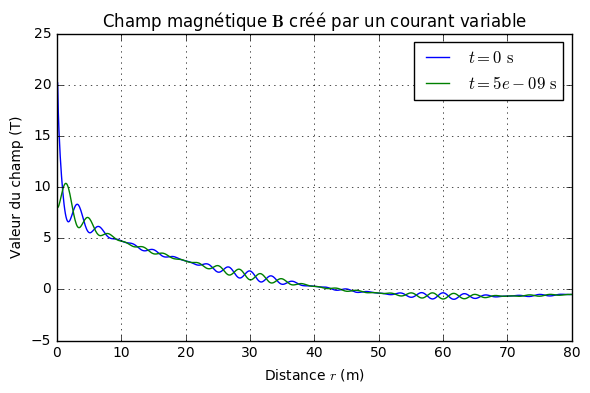

In [158]:
times = [0.000000001*k for k in [0, 5]]

fig_Btheta, ax_Btheta = graphe_B(times)
fig_Btheta.savefig('profil_champ.png')

In [132]:
def build_field(t):
    wind = rmax
    
    Y, X = np.ogrid[-wind:wind:wind*10j, -wind:wind:wind*10j]
    
    def field_func(x,y):
        r = np.sqrt(x*x+y*y)
        Btheta = B_function(r, t)
        direct = np.array([-y/r, x/r])
        return Btheta*direct
    
    field_X, field_Y = field_func(X, Y)
    
    
    color = np.exp(-np.sqrt(field_X**2 + field_Y**2))
    
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    ax.grid()
    ax.set_aspect('equal')
    
    ax.set_xlim((-wind,wind))
    ax.set_ylim((-wind,wind))
    
    title_text = r'Champ magnétique $\mathbf{B}$ à '
    title_text += r"$t={:g}$".format(t)
    title_text += r" $\mathrm{s}$"
    ax.set_title(title_text)
    
    Z = np.exp(-2*np.sqrt(field_X**2+field_Y**2))
    Z = np.nan_to_num(Z)
    
    strm = ax.streamplot(X,Y, field_X, field_Y, 
        arrowstyle='->', 
        arrowsize=2, 
        color=Z,
        cmap=plt.cm.inferno,density=2 
        )
    
    #fig.colorbar(strm.lines)
    
    fig.tight_layout()
    
    return fig
    

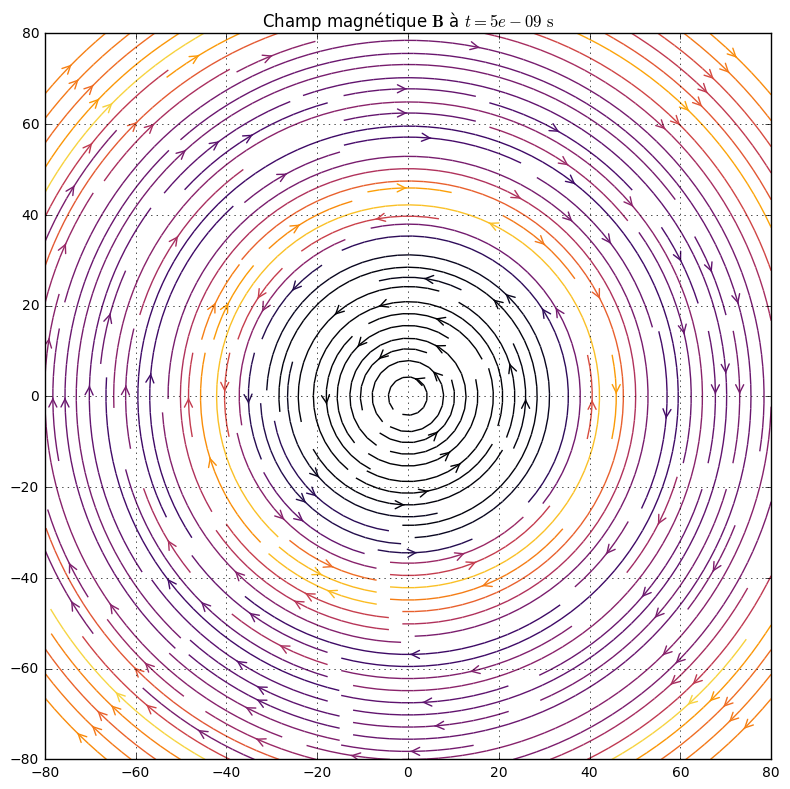

In [144]:
t = 5e-9

output_field = build_field(t)
output_field.savefig("champmag_courant_variable.png")

# Théorie

Le champ magnétique $\mathbf{B}$ dérive d'un champ $\mathbf A$ appelé *potentiel vecteur*: $\mathbf{B} = \boldsymbol\nabla\wedge\mathbf{A}$. Par symétrie cylindrique, on a $\mathbf{B}(\mathbf r, t) = B(r,t)\mathbf{e}_\theta$. Par suite $\mathbf A(\mathbf r,t) = A(r,t)\mathbf e_z$.

Le potentiel vecteur $\mathbf{A} = A(r,t)\mathbf{e}_z$ est solution de l'équation des ondes

$$
\left(\Delta  - \frac{1}{c^2}\frac{\partial^2}{\partial t^2}\right)\mathbf{A} = - \mu_0\mathbf{J}(r,t),
$$

avec $\mathbf J(r,t)  = \dfrac{i(t)\delta(r)}{2\pi r}\mathbf{e}_\theta$. 


Pour un courant sinusoïdal $i(t) = I\exp(i\omega t)$, le potentiel s'écrit $A(r,t) = f(r)\exp(i\omega t)$ et l'EDP se réduit à

\begin{equation}
\frac{1}{r}\frac{\mathrm d}{\mathrm dr}\left(r\frac{\mathrm df}{\mathrm dr} \right) + k^2f(r) = -\frac{\mu_0I\delta(r)}{2\pi r},
\end{equation}

avec $k=\dfrac{\omega}{c}$.

La solution générale prend la forme

$$
f(r) = AJ_0(kr) + BY_0(kr)
$$

où $J_0,Y_0$ sont les 0-ièmes fonctions de Bessel de la première et seconde espèce, solutions de

$$
\frac{1}{r}\frac{\mathrm d}{\mathrm dr}\left(r\frac{\mathrm df}{\mathrm dr} \right) + k^2f(r) = 0,
$$

et $A$ et $B$ dépendent de la pulsation $\omega$ du courant.